In [1]:
# this section taken from the CoinMarketCap API Documentation code 
# this is the code that pulls the data from the page url, also need personal
# api key for your computer (just need to make an account with CoinMarketCap)

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


# the next lines of code are necessary for accessing the page via the url 
# correctly - see API web scraping using pandas/BeautifulSoup video for 
# refereence if needed, but this code is straight from the documentation 
# other than the url and the personal api key ! 

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '71c8f47d-ab27-4fad-8a4b-660f91e45e61',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# this outputs the data from the page, just in shitty format 

{'status': {'timestamp': '2023-12-19T17:38:14.255Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8908}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10666, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [10]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [4]:


df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


# pulling the data from the url of the page directly, and json_normalize 
# makes it look pretty and essentially formats the data as a df 

# now you have the data once you scrape this, you can alter it, save it as
# csv and perform analysis on it  --- AND they already had the code to 
# retrieve it in the api documentation 

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10666,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.957466e+07,1.957466e+07,False,NaN,1,NaN,NaN,None,2023-12-19T17:37:00.000Z,41947.137061,2.450981e+10,5.0187,-1.161468,0.943231,2.631973,14.591018,42.294255,53.957414,8.211010e+11,52.2405,8.808899e+11,None,2023-12-19T17:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:38:23.534804
1,1027,Ethereum,ETH,ethereum,8069,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201939e+08,1.201939e+08,True,NaN,2,NaN,NaN,None,2023-12-19T17:37:00.000Z,2152.818474,1.041145e+10,3.6337,-1.880434,-0.595954,-0.868436,8.832518,33.872672,31.951630,2.587556e+11,16.4559,2.587556e+11,None,2023-12-19T17:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:38:23.534804
2,825,Tether USDt,USDT,tether,68897,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.091790e+10,9.360908e+10,True,NaN,3,NaN,NaN,None,2023-12-19T17:36:00.000Z,0.999700,4.551077e+10,-0.5712,0.031891,-0.012722,0.034281,-0.077670,-0.052282,-0.051682,9.089062e+10,5.7747,9.358099e+10,None,2023-12-19T17:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-19 17:38:23.534804
3,1839,BNB,BNB,bnb,1891,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516948e+08,1.516948e+08,False,NaN,4,NaN,NaN,None,2023-12-19T17:36:00.000Z,251.902873,1.166585e+09,34.7731,-0.460294,5.443587,0.917087,2.948963,18.459784,16.528595,3.821236e+10,2.4278,3.821236e+10,None,2023-12-19T17:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:38:23.534804
4,52,XRP,XRP,xrp,1181,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.400560e+10,9.998815e+10,False,NaN,5,NaN,NaN,None,2023-12-19T17:37:00.000Z,0.599333,1.173723e+09,-25.4713,-1.036458,-0.232138,-1.466619,-3.705513,15.384147,15.314787,3.236734e+10,2.0593,5.993331e+10,None,2023-12-19T17:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:38:23.534804
5,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.278431e+08,5.652154e+08,True,NaN,6,NaN,NaN,None,2023-12-19T17:37:00.000Z,72.704948,1.925315e+09,-10.9217,-1.042669,1.163711,9.328939,21.251237,173.251583,258.471750,3.110631e+10,1.9783,4.109396e+10,None,2023-12-19T17:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:38:23.534804
6,3408,USDC,USDC,usd-coin,15608,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.470376e+10,2.470376e+10,False,NaN,7,NaN,NaN,None,2023-12-19T17:36:00.000Z,1.000090,5.459535e+09,-3.3850,0.013144,-0.033186,-0.003827,0.004198,0.009989,-0.014813,2.470599e+10,1.5697,2.470599e+10,None,2023-12-19T17:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-19 17:38:23.534804
7,2010,Cardano,ADA,cardano,1008,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.534018e+10,3.645469e+10,False,NaN,8,NaN,NaN,None,2023-12-19T17:36:00.000Z,0.575747,6.733684e+08,-2.3116,-0.914559,0.192122,2.618335,51.959379,129.720440,125.406376,2.034702e+10,1.2927,2.590864e+10,None,2023-12-19T17:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:38:23.534804
8,5805,Avalanche,AVAX,avalanche,606,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7

In [12]:
# CREATING function to automate scraping the original page data and 
# appending any new data or results to our df 
# using the code from the documentation as our skeleton  !! 

# NOTE: need to go into the anaconda prompt and run 
# 'jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10'
# to allow data to be scraped from the url page 

def api_runner(): 
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
                 }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '71c8f47d-ab27-4fad-8a4b-660f91e45e61',
             }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df= pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    # df_append = pd.DataFrame(df2)
    # df = pd.concat([df, df_append])

    
    if not os.path.isfile(r'C:\Users\judmu\Desktop\Personal Projects\Python_Pandas files\Data\API.csv'):
        df.to_csv(r'C:\Users\judmu\Desktop\Personal Projects\Python_Pandas files\Data\API.csv', header = 'column_names')
    else: 
        df.to_csv(r'C:\Users\judmu\Desktop\Personal Projects\Python_Pandas files\Data\API.csv', mode = 'a', header = False)
        
    
    # check to see if this data file is already in our file folder, if not 
    # it will create it as a csv, and make the column headers based off 
    # this df , if it DOES exist,just appends our current data to it to keep 
    # up to date 

In [20]:
# necessary libraries for automating our api runner function on a timed
# schedule or script 

# reminder: api default only gives you 333 runs per day on the CoinMarketCap
# website !
# sleep(60) means sleep for 60 seconds after you run 

# for example purposess this loop was interupted on purpose


import os 
from time import time 
from time import sleep 

 
for i in range(333): 
    api_runner() # our function 
    print('API Runner Completed!')
    sleep(10) # sleep 1 minute 
exit()  


API Runner Completed!
API Runner Completed!
API Runner Completed!


KeyboardInterrupt: 

In [40]:
# reminder, starting out with one df, so however many repeats of the dataset will be however many times 
# the function loops + 1 !!! 

df123 = pd.read_csv(r'C:\Users\judmu\Desktop\Personal Projects\Python_Pandas files\Data\API.csv')
df123

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10666,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19574662.00000,19574662.00000,False,NaN,1,NaN,NaN,NaN,2023-12-19T17:48:00.000Z,42096.54577,24690420860.07762,5.87880,-0.61982,1.38831,3.13391,15.11495,42.68095,54.76554,824025654894.68542,52.36200,884027461255.18994,NaN,2023-12-19T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:49:24.410311
1,1,1027,Ethereum,ETH,ethereum,8069,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120193886.27062,120193886.27062,True,NaN,2,NaN,NaN,NaN,2023-12-19T17:48:00.000Z,2154.91801,10531174303.22162,5.06640,-1.38048,-0.53290,-0.62708,9.32371,33.88558,32.28984,259007970801.00891,16.45940,259007970801.01001,NaN,2023-12-19T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:49:24.410311
2,2,825,Tether USDt,USDT,tether,68897,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,90917901311.46834,93609080551.46371,True,NaN,3,NaN,NaN,NaN,2023-12-19T17:47:00.000Z,0.99985,45804500575.26962,0.17920,0.00112,0.03748,-0.00659,-0.06135,-0.03301,-0.02921,90904490322.07571,5.77640,93595272595.39999,NaN,2023-12-19T17:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-19 17:49:24.410311
3,3,1839,BNB,BNB,bnb,1891,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151694807.69114,151694807.69114,False,NaN,4,NaN,NaN,NaN,2023-12-19T17:47:00.000Z,253.05248,1178076758.94873,36.13010,-0.12113,5.99180,1.17395,3.50032,18.96171,17.19883,38386747925.67682,2.43930,38386747925.68000,NaN,2023-12-19T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:49:24.410311
4,4,52,XRP,XRP,xrp,1181,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54005597115.00000,99988151135.00000,False,NaN,5,NaN,NaN,NaN,2023-12-19T17:48:00.000Z,0.60008,1179043898.45159,-25.20220,-0.82828,-0.08800,-1.43927,-3.56081,15.35303,15.66046,32407597933.96542,2.05930,60007850417.72000,NaN,2023-12-19T17:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:49:24.410311
5,5,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,427843051.58827,565215434.32449,True,NaN,6,NaN,NaN,NaN,2023-12-19T17:47:00.000Z,72.70809,1932087989.82336,-10.41510,-0.85900,1.30075,9.24713,21.42469,171.76424,259.22688,31107649953.29774,1.97680,41095733152.37000,NaN,2023-12-19T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:49:24.410311
6,6,3408,USDC,USDC,usd-coin,15608,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24703763844.01722,24703763844.01722,False,NaN,7,NaN,NaN,NaN,2023-12-19T17:47:00.000Z,1.00033,5473682092.52007,-2.90410,-0.00805,0.01197,-0.02384,0.03497,0.03444,0.02440,24711874389.32681,1.57030,24711874389.33000,NaN,2023-12-19T17:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-19 17:49:24.410311
7,7,2010,Cardano,ADA,cardano,1008,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35340181954.21900,36454694073.67300,False,NaN,8,NaN,NaN,NaN,2023-12-19T17:47:00.000Z,0.57477,678746090.69856,-1.51670,-1.44962,0.20628,2.87917,52.18694,129.28262,125.75141,20312329516.87682,1.29070,25864462991.26000,NaN,2023-12-19T17:47

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# go back and look at LAMBDAS!!! (like a modified for loop)

In [21]:
df



,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10666,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19574662.00000,19574662.00000,False,NaN,1,NaN,NaN,None,2023-12-19T17:57:00.000Z,41866.81165,24807143864.13153,6.67810,-1.14627,0.96929,2.67406,14.33598,41.85056,53.75915,819528687072.28040,52.15460,879203044656.30005,None,2023-12-19T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:57:53.471057
1,1027,Ethereum,ETH,ethereum,8069,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120193886.27062,120193886.27062,True,NaN,2,NaN,NaN,None,2023-12-19T17:57:00.000Z,2141.30928,10627155537.75818,5.97070,-1.77211,-1.11077,-1.47419,8.48200,33.14147,31.35536,257372284010.03168,16.36780,257372284010.03000,None,2023-12-19T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:57:53.471057
2,825,Tether USDt,USDT,tether,68897,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90917901311.46834,93609080551.46373,True,NaN,3,NaN,NaN,None,2023-12-19T17:56:00.000Z,0.99983,45965693898.31312,0.69030,0.01791,0.02638,0.06472,-0.07581,-0.04147,-0.02607,90902442241.95348,5.76440,93593163891.89999,None,2023-12-19T17:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-19 17:57:53.471057
3,1839,BNB,BNB,bnb,1891,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151694807.69114,151694807.69114,False,NaN,4,NaN,NaN,None,2023-12-19T17:56:00.000Z,252.61142,1180812387.79758,36.32980,-0.49503,5.91104,0.74031,3.32267,18.69630,16.98221,38319840836.85757,2.43000,38319840836.86000,None,2023-12-19T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:57:53.471057
4,52,XRP,XRP,xrp,1181,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54005597115.00000,99988151135.00000,False,NaN,5,NaN,NaN,None,2023-12-19T17:57:00.000Z,0.59902,1180870082.90252,-25.18830,-0.98530,-0.29120,-1.69706,-3.61327,15.11474,15.38174,32350627156.21636,2.05880,59902359911.56000,None,2023-12-19T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:57:53.471057
5,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427843051.58827,565215434.32449,True,NaN,6,NaN,NaN,None,2023-12-19T17:57:00.000Z,72.29776,1937004845.74194,-9.77200,-1.52343,0.62146,9.01155,20.43277,169.87397,256.15672,30932095752.20694,1.96720,40863811788.57000,None,2023-12-19T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-19 17:57:53.471057
6,3408,USDC,USDC,usd-coin,15608,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24703763844.01722,24703763844.01722,False,NaN,7,NaN,NaN,None,2023-12-19T17:56:00.000Z,1.00009,5510880320.96646,-1.94850,-0.01435,-0.01260,0.00632,0.00078,0.01052,0.00349,24706084513.48440,1.56670,24706084513.48000,None,2023-12-19T17:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-19 17:57:53.471057
7,2010,Cardano,ADA,cardano,1008,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35340181954.21900,36454694073.67300,False,NaN,8,NaN,NaN,None,2023-12-19T17:56:00.000Z,0.57240,682264939.85675,-0.97660,-1.93364,-0.31668,2.48629,51.55149,128.30719,124.77678,20228671186.03996,1.28280,25757937651.57000,None,2023-12-19T17:56:00.000Z,NaN

In [27]:
df3 = df123.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.61982,1.38831,3.13391,15.11495,42.68095,54.76554
Ethereum,-1.38048,-0.53290,-0.62708,9.32371,33.88558,32.28984
Tether USDt,0.00112,0.03748,-0.00659,-0.06135,-0.03301,-0.02921
BNB,-0.12113,5.99180,1.17395,3.50032,18.96171,17.19883
XRP,-0.82828,-0.08800,-1.43927,-3.56081,15.35303,15.66046
Solana,-0.85900,1.30075,9.24713,21.42469,171.76424,259.22688
USDC,-0.00805,0.01197,-0.02384,0.03497,0.03444,0.02440
Cardano,-1.44962,0.20628,2.87917,52.18694,129.28262,125.75141
Avalanche,-1.18895,-0.87872,7.63428,81.24533,328.57609,332.77691


In [32]:
df4 = df3.stack()
df4

# returns all of the values from each of the columns of df3 as a series
# same data just more workable format/structure for visualizations 

# in this case returns the averages for each column as different rows 
# associated with each coin 

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.61982
             quote.USD.percent_change_24h     1.38831
             quote.USD.percent_change_7d      3.13391
             quote.USD.percent_change_30d    15.11495
             quote.USD.percent_change_60d    42.68095
             quote.USD.percent_change_90d    54.76554
Ethereum     quote.USD.percent_change_1h     -1.38048
             quote.USD.percent_change_24h    -0.53290
             quote.USD.percent_change_7d     -0.62708
             quote.USD.percent_change_30d     9.32371
             quote.USD.percent_change_60d    33.88558
             quote.USD.percent_change_90d    32.28984
Tether USDt  quote.USD.percent_change_1h      0.00112
             quote.USD.percent_change_24h     0.03748
             quote.USD.percent_change_7d     -0.00659
             quote.USD.percent_change_30d    -0.06135
             quote.USD.percent_change_60d    -0.03301
             quote.USD.percent_change_90

In [33]:
df5 = df4.to_frame(name= 'values')
df5

# now same structure as df4, but now as a data frame with headers
# not a series 

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.61982
            quote.USD.percent_change_24h   1.38831
            quote.USD.percent_change_7d    3.13391
            quote.USD.percent_change_30d  15.11495
            quote.USD.percent_change_60d  42.68095
            quote.USD.percent_change_90d  54.76554
Ethereum    quote.USD.percent_change_1h   -1.38048
            quote.USD.percent_change_24h  -0.53290
            quote.USD.percent_change_7d   -0.62708
            quote.USD.percent_change_30d   9.32371
            quote.USD.percent_change_60d  33.88558
            quote.USD.percent_change_90d  32.28984
Tether USDt quote.USD.percent_change_1h    0.00112
            quote.USD.percent_change_24h   0.03748
            quote.USD.percent_change_7d   -0.00659
            quote.USD.percent_change_30d  -0.06135
            quote.USD.percent_change_60d  -0.03301
            quote.USD.percent_change_90d  -0.02921
BNB         quote.USD.percent_change_1h   -0.12113
            quote.USD.percent_change_24h   5.99180
            quote.USD.percent_change_7d    1.17395
            quote.USD.percent_change_30d   3.50032
            quote.USD.percent_change_60d  18.96171
            quote.USD.percent_change_90d  17.19883
XRP         quote.USD.percent_change_1h   -0.82828
            quote.USD.percent_change_24h  -0.08800
            quote.USD.percent_change_7d   -1.43927
            quote.USD.percent_change_30d  -3.56081
            quote.USD.percent_change_60d  15.35303
            quote.USD.percent_change_90d  15.66046
Solana      quote.USD.percent_change_1h   -0.85900
            quote.USD.percent_change_24h   1.30075
            quote.USD.percent_change_7d    9.24713
            quote.USD.percent_change_30d  21.42469
            quote.USD.percent_change_60d 171.76424
            quote.USD.percent_change_90d 259.22688
USDC        quote.USD.percent_change_1h   -0.00805
            quote.USD.percent_change_24h   0.01197
            quote.USD.percent_change_7d   -0.02384
            quote.USD.percent_change_30d   0.03497
            quote.USD.percent_change_60d   0.03444
            quote.USD.percent_change_90d   0.02440
Cardano     quote.USD.percent_change_1h   -1.44962
            quote.USD.percent_change_24h   0.20628
            quote.USD.percent_change_7d    2.87917
            quote.USD.percent_change_30d  52.18694
            quote.USD.percent_change_60d 129.28262
            quote.USD.percent_change_90d 125.75141
Avalanche   quote.USD.percent_change_1h   -1.18895
            quote.USD.percent_change_24h  -0.87872
            quote.USD.percent_change_7d    7.63428
            quote.USD.percent_change_30d  81.24533
            quote.USD.percent_change_60d 328.57609
            quote.USD.percent_change_90d 332.77691
Dogecoin    quote.USD.percent_change_1h   -1.21732
            quote.USD.percent_change_24h  -0.05616
            quote.USD.percent_change_7d   -2.41733
            quote.USD.percent_change_30d  14.44839
            quote.USD.percent_change_60d  50.06330
            quote.USD.percent_change_90d  44.37667
TRON        quote.USD.percent_change_1h   -0.42650
            quote.USD.percent_change_24h   0.53746
            quote.USD.percent_change_7d   -2.65410
            quote.USD.percent_change_30d  -2.92101
            quote.USD.percent_change_60d   9.99783
            quote.USD.percent_change_90d  18.45335
Polkadot    quote.USD.percent_change_1h   -1.46986
            quote.USD.percent_change_24h   0.00860
            quote.USD.percent_change_7d   -3.13984
            quote.USD.percent_change_30d  22.80803
            quote.USD.percent_change_60d  80.01496
            quote.USD.percent_change_90d  62.22778
Chainlink   quote.USD.percent_change_1h   -1.35195
            quote.USD.percent_change_24h  -0.76374
            quote.USD.percent_change_7d   -1.53803
            quote.USD.percent_change_30d  -0.97304
            quote.USD.percent_change_60d  83.85126
            quo

In [38]:
index= pd.Index(range(90))

df6 = df5.reset_index()
df6

# resetting our index so that multiple rows for each entry, and the 
# columns from earlier df are now rows with values ! 

# essentially expanding out the dataset so the entries are complete for 
# each row 

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.61982
1,Bitcoin,quote.USD.percent_change_24h,1.38831
2,Bitcoin,quote.USD.percent_change_7d,3.13391
3,Bitcoin,quote.USD.percent_change_30d,15.11495
4,Bitcoin,quote.USD.percent_change_60d,42.68095
5,Bitcoin,quote.USD.percent_change_90d,54.76554
6,Ethereum,quote.USD.percent_change_1h,-1.38048
7,Ethereum,quote.USD.percent_change_24h,-0.53290
8,Ethereum,quote.USD.percent_change_7d,-0.62708
9,Ethereum,quote.USD.percent_change_30d,9.32371


In [70]:
df7= df6.rename(columns = {'level_1': 'percent_change'})
df7

# renaming columns to clean df 

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.61982
1,Bitcoin,quote.USD.percent_change_24h,1.38831
2,Bitcoin,quote.USD.percent_change_7d,3.13391
3,Bitcoin,quote.USD.percent_change_30d,15.11495
4,Bitcoin,quote.USD.percent_change_60d,42.68095
5,Bitcoin,quote.USD.percent_change_90d,54.76554
6,Ethereum,quote.USD.percent_change_1h,-1.38048
7,Ethereum,quote.USD.percent_change_24h,-0.53290
8,Ethereum,quote.USD.percent_change_7d,-0.62708
9,Ethereum,quote.USD.percent_change_30d,9.32371


In [73]:
# df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], [ '24hr', '7d', '30d', '60d', '90d'])


df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1hr'])
df7

# renaming to get rid of horrible % change header names

# df looks WAY more cleaned up and usable now 

,name,percent_change,values
0,Bitcoin,1hr,-0.61982
1,Bitcoin,24hr,1.38831
2,Bitcoin,7d,3.13391
3,Bitcoin,30d,15.11495
4,Bitcoin,60d,42.68095
5,Bitcoin,90d,54.76554
6,Ethereum,1hr,-1.38048
7,Ethereum,24hr,-0.53290
8,Ethereum,7d,-0.62708
9,Ethereum,30d,9.32371


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# now we want to create a visualization with our data that 
# we extracted and repeated + exported to csv!!! (from df123 originally)
# can monitor tracking over time or summary of tracking over time 
# through different visualizations !! 


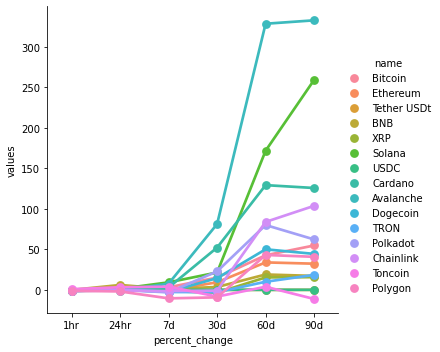

In [74]:
sns.catplot(x='percent_change', y= 'values', hue = 'name', data = df7, kind='point')

# hue= sets a sort of legend based on the row entries 

In [77]:
df9= df123[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

# selecting only specific columns

,name,quote.USD.price,timestamp
0,Bitcoin,42096.54577,2023-12-19 17:49:24.410311
15,Bitcoin,42096.54577,2023-12-19 17:49:35.349297
30,Bitcoin,41866.81165,2023-12-19 17:57:32.179480
45,Bitcoin,41866.81165,2023-12-19 17:57:42.658572
60,Bitcoin,41866.81165,2023-12-19 17:57:53.471057


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

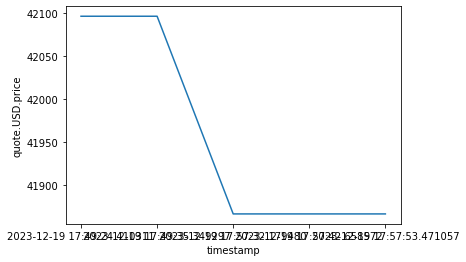

In [78]:
sns.lineplot(x= 'timestamp', y= 'quote.USD.price', data = df9)
# only looking at VERY short time series in this case!! 
# visualization example if you only selected a subset of columns